## **Imports**

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import re


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [4]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:
import pickle

In [6]:
tweeting_df = pd.read_csv("C:\\Users\\aksha\\Documents\\project final year\\outputfinal (2).csv")

In [7]:
# tweeting_df = pd.read_csv('data1comb.csv')

# code initial

In [8]:
tweeting_df

,Unnamed: 0,label,tweet
0,0,0,yeah got 2 backups hate happen strugglin week ...
1,1,0,hate using bb love iphone havent tried new bb ...
2,2,1,get fucking real dude
3,3,1,dirty come crook rengel dems fucking corrupt j...
4,4,1,fuck could day lets hour ping later sched writ...
...,...,...,...
68803,68803,1,user judd amp homophobic freemilo milo freemil...
68804,68804,1,lady banned kentucky mall user jcpenny kentucky
68805,68805,1,user omfg im offended im mailbox im proud mail...
68806,68806,1,user user dont balls hashtag say weasel away l...


In [9]:
# tweeting_df.columns=['index','tweet','label']
tweeting_df.columns=['index','label','tweet']


In [10]:
tweeting_df.pop('index')

0            0
1            1
2            2
3            3
4            4
         ...  
68803    68803
68804    68804
68805    68805
68806    68806
68807    68807
Name: index, Length: 68808, dtype: int64

In [11]:
tweet_df=tweeting_df
tweet_df

,label,tweet
0,0,yeah got 2 backups hate happen strugglin week ...
1,0,hate using bb love iphone havent tried new bb ...
2,1,get fucking real dude
3,1,dirty come crook rengel dems fucking corrupt j...
4,1,fuck could day lets hour ping later sched writ...
...,...,...
68803,1,user judd amp homophobic freemilo milo freemil...
68804,1,lady banned kentucky mall user jcpenny kentucky
68805,1,user omfg im offended im mailbox im proud mail...
68806,1,user user dont balls hashtag say weasel away l...


In [12]:
tweet_df.shape

(68808, 2)

In [13]:
tweet_df['label'].value_counts()

1    46807
0    22001
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

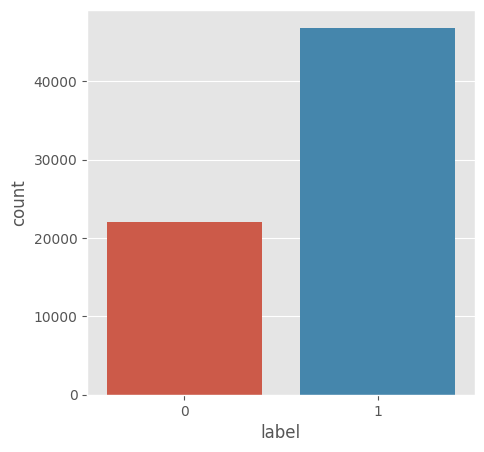

In [14]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

In [15]:
tweet_df.head()

,label,tweet
0,0,yeah got 2 backups hate happen strugglin week ...
1,0,hate using bb love iphone havent tried new bb ...
2,1,get fucking real dude
3,1,dirty come crook rengel dems fucking corrupt j...
4,1,fuck could day lets hour ping later sched writ...


In [16]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68808 entries, 0 to 68807
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   68808 non-null  int64 
 1   tweet   68806 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [17]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

yeah got 2 backups hate happen strugglin week nowhandle tho 

hate using bb love iphone havent tried new bb bb provided corp dont get pick model 

get fucking real dude 

dirty come crook rengel dems fucking corrupt joke make republicans look like 

fuck could day lets hour ping later sched writing book 



# preprocessing

In [18]:
def data_processing(tweet):
    tweet = re.sub("\d*\.\d+","",str(tweet)) # convert numbers present to strings --decimal number
    tweet = re.sub("\d+","",str(tweet)) # convert numbers present to strings-- just number
    tweet = tweet.lower()
#     tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE) #replace https with null-> ''
    tweet = re.sub(r"((www.[^s]+)|(http\S+))","",tweet,flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub("\d*\.\d+","",tweet)
    tweet =  re.sub(r'(\w)\1{2,}', r'\1\1', tweet) #booooookkkkkkkkk
    tweet = re.sub(r'[^\w\s]','',tweet) #This line of code removes all non-word and non-space
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [19]:
print(data_processing("hello 99.9 ca9909lling 66 @12$ ##3 booooookkkkkkkkk www.gagsydyb httpsytuyg sh***"))

hello calling bookk sydyb sh


In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
print(tweet_df['tweet'].iloc[0])

yeah got 2 backups hate happen strugglin week nowhandle tho


In [22]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [23]:
print(tweet_df['tweet'].iloc[0])

# "Another bloody instant restaurant week?!?! Seriously! They jumped shark riding two sharks powered sh…"

yeah got backups hate happen strugglin week nowhandle tho


In [24]:
print(tweet_df['tweet'].iloc[67])

okay cool help guys weekend routers bitch get working times


In [25]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [26]:
tweet_df.shape

(68646, 2)

<AxesSubplot: xlabel='label', ylabel='count'>

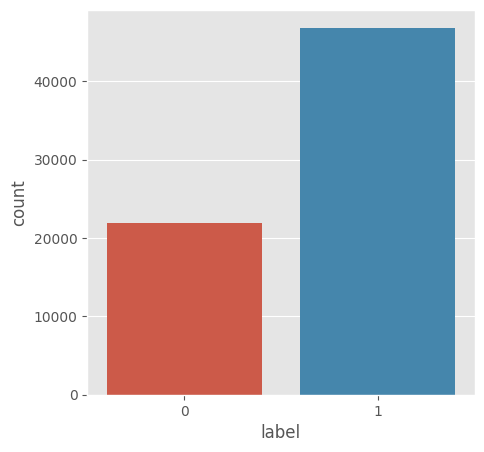

In [27]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

# lemmatizatiion

In [28]:
# lemmatizer = WordNetLemmatizer() # similar but different frop stemming by considering the literal meaning of the word
# def lemmatizing(data):
#     lemmatizer = WordNetLemmatizer()
#     tweet = [lemmatizer.lemmatize(word) for word in data]
#     lemmatized_text = ' '.join(tweet)
#     return lemmatized_text
# #check for renaming tweet to data


def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [29]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
print(lemmatizing("the book is filled"))

the book be fill


# check for correct lematizatn

In [31]:
print(lemmatizing(tweet_df['tweet'].iloc[0]))

# "Another bloody instant restaurant week ?!?! Seriously ! They just jump the shark ride two other shark power by sh …"

yeah get backups hate happen strugglin week nowhandle tho


In [32]:
print(tweet_df['tweet'].iloc[0])

yeah got backups hate happen strugglin week nowhandle tho


In [33]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))#replace each tweet by its root word
# tweet_df= tweet_df.copy()
# tweet_df['tweet'] = tweet_df_copy['tweet'].apply(lambda x: lemmatizing(x))


C:\Users\aksha\AppData\Local\Temp\ipykernel_2280\1176147440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))#replace each tweet by its root word


In [34]:
print(tweet_df['tweet'].iloc[0])

yeah get backups hate happen strugglin week nowhandle tho


In [35]:
tweet_df_lemma = tweet_df.copy()

# Visualizing

<AxesSubplot: xlabel='label', ylabel='count'>

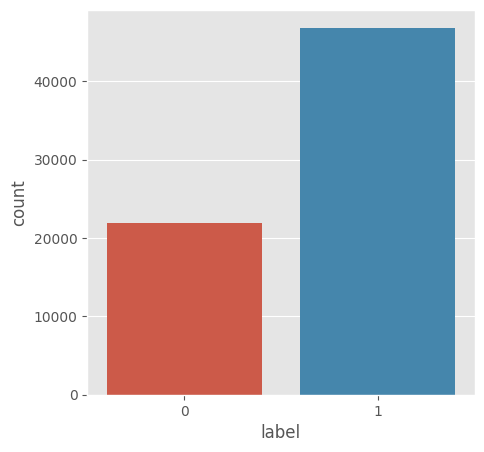

In [36]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

In [37]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[69],"\n")

yeah get backups hate happen strugglin week nowhandle tho 

hate use bb love iphone havent try new bb bb provide corp dont get pick model 

get fuck real dude 

dirty come crook rengel dems fuck corrupt joke make republicans look like 

hate show take holiday break killer free time 



In [38]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68646 entries, 0 to 68807
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   68646 non-null  int64 
 1   tweet   68646 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [39]:
tweet_df['label'].value_counts()

1    46768
0    21878
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

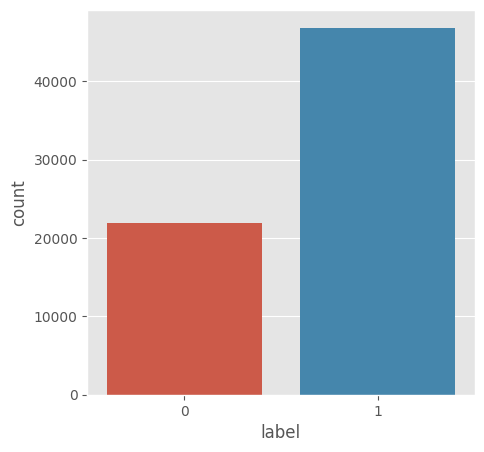

In [40]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

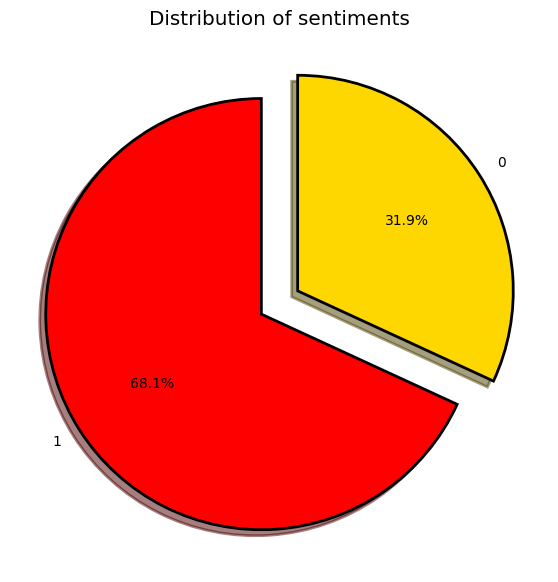

In [41]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [42]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

,label,tweet
0,0,yeah get backups hate happen strugglin week no...
1,0,hate use bb love iphone havent try new bb bb p...
9,0,wow lol sound like lot piss hehehe
10,0,damn thangthe typical rap beef one person worr...
12,0,well damn need mother time


In [43]:
# text = ' '.join([word for word in non_hate_tweets['tweet']])
# plt.figure(figsize=(20,15), facecolor='None')
# wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Most frequent words in non hate tweets', fontsize = 19)
# plt.show()

In [44]:
neg_tweets = tweet_df[tweet_df.label == 0]
neg_tweets.head()

,label,tweet
0,0,yeah get backups hate happen strugglin week no...
1,0,hate use bb love iphone havent try new bb bb p...
9,0,wow lol sound like lot piss hehehe
10,0,damn thangthe typical rap beef one person worr...
12,0,well damn need mother time


In [45]:
'''text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
#plt.show()'''

"text = ' '.join([word for word in neg_tweets['tweet']])\nplt.figure(figsize=(20,15), facecolor='None')\nwordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)\nplt.imshow(wordcloud, interpolation='bilinear')\nplt.axis('off')\nplt.title('Most frequent words in hate tweets', fontsize = 19)\n#plt.show()"



# Split train and test 

In [46]:
X = tweet_df['tweet']
Y = tweet_df['label']
type((X[0]))

str

In [47]:
# X = vect.transform(X)

In [48]:
print(X)

0        yeah get backups hate happen strugglin week no...
1        hate use bb love iphone havent try new bb bb p...
2                                       get fuck real dude
3        dirty come crook rengel dems fuck corrupt joke...
4        fuck could day let hour ping later sched write...
                               ...                        
68803    user judd amp homophobic freemilo milo freemil...
68804         lady ban kentucky mall user jcpenny kentucky
68805    user omfg im offend im mailbox im proud mailbo...
68806    user user dont ball hashtag say weasel away lu...
68807                    make ask anybody god oh thank god
Name: tweet, Length: 68646, dtype: object


In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)#the same train and test data each time.

In [50]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (54916,)
Size of y_train: (54916,)
Size of x_test:  (13730,)
Size of y_test:  (13730,)


# TF vector feature extraction

In [51]:
# vect = TfidfVectorizer(ngram_range=(1,2),max_features=3000,token_pattern=r'\b[a-zA-Z]+\b').fit(tweet_df['tweet'])
vect2 = TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vector2=vect2.fit(x_train)

In [52]:
feature_names = vector2.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:100]))
pickle.dump(vector2, open('vectorizer', 'wb'))

Number of features: 476116

First 20 features: 
['__' '__ dont' '__ insert' '__ suck' '__chris__' '__chris__ im'
 '__enimey__' '__gershom' '__gershom im' '__hajihuntress'
 '__hajihuntress islamicstatemedia' '__victorlopez__'
 '__victorlopez__ line' '_acestayicy' '_acestayicy im' '_allahu_akbar_'
 '_allahu_akbar_ never' '_angryman' '_angryman mkr' '_blackglass__'
 '_blackglass__ curdistani' '_blackglass__ dumuzi'
 '_blackglass__ issa_kobani' '_blackglass__ theyellowpete' '_bobbidana'
 '_bobbidana never' '_bryancaban' '_bryancaban im' '_charliewilson'
 '_charliewilson mandatory' '_chonz' '_chonz call' '_chrisdowns_'
 '_chrisdowns_ questionsformen' '_chrisnichols' '_chrisnichols call'
 '_d_n_verg_' '_d_n_verg_ stevesalaita' '_dantomlinson' '_dantomlinson im'
 '_dirtytruths' '_dirtytruths argue' '_dirtytruths article'
 '_dirtytruths blabber' '_dirtytruths certainly' '_dirtytruths divide'
 '_dirtytruths dont' '_dirtytruths drone' '_dirtytruths evidence'
 '_dirtytruths first' '_dirtytruths g

In [53]:
vect3 = TfidfVectorizer(ngram_range=(1,3),max_features=500000,token_pattern=r'\b[a-zA-Z]+\b')
vector3 = vect3.fit(x_train)

In [54]:
feature_names = vector3.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))


# The output of the TfidfVectorizer is a sparse matrix of shape (n_samples, n_features), 
#where n_samples is the number of documents in the input and n_features is the total number of unique features extracted from the text

Number of features: 500000

First 20 features: 
['aa' 'aah' 'aahh' 'aaliyah' 'aalwuhaib' 'aalwuhaib dankmtl'
 'aalwuhaib muslim' 'aalwuhaib muslims' 'aamir' 'aampe' 'aand' 'aande'
 'aap' 'aap ka' 'aargh' 'aaron' 'aaron swartz' 'aarondagloria'
 'aarondagloria yesyouresexist' 'aas']


In [55]:
print(feature_names)

['aa' 'aah' 'aahh' ... 'zz yawn' 'zz yawn damn' 'zzuuzz']


In [56]:
pickle.dump(vector2, open('vectorizer', 'wb'))

In [57]:
# # Transforming the data using TF-IDF Vectorizer
# vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 500000)
# vectoriser.fit(X_train)
# # print("No. of feature words: ",len(vectoriser.get_feature_names()))

In [58]:
# # Transforming the data using TF-IDF Vectorizer
# vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 500000)
# vectoriser.fit(x_train)
# # print("No. of feature words: ",len(vectoriser.get_feature_names()))
# pickle.dump(vectoriser, open('vectorizer', 'wb'))

In [59]:
# feature_names = vectoriser.get_feature_names_out()
# print("Number of features: {}\n".format(len(feature_names)))
# print("First 20 features: \n{}".format(feature_names[:20]))

# Transform data

In [60]:
# Transform train and test data
X_train = vector2.transform(x_train)
X_test = vector2.transform(x_test)

# X_train_tfidf = vectorizer.transform(train_data['text']).toarray()
# X_test_tfidf = vectorizer.transform(test_data['text']).toarray()
# y_train = train_data['label']
# y_test = test_data['label']

In [61]:
print(X_train)

  (0, 455934)	0.1725325931300694
  (0, 455777)	0.11727315668782
  (0, 447758)	0.21583900201642833
  (0, 447222)	0.08097822096191896
  (0, 441812)	0.1784069904827539
  (0, 441806)	0.12823949367732076
  (0, 414312)	0.21583900201642833
  (0, 413851)	0.09976200392428765
  (0, 400602)	0.21583900201642833
  (0, 400509)	0.11900948613487479
  (0, 367993)	0.21583900201642833
  (0, 367827)	0.11578635482015884
  (0, 361884)	0.21583900201642833
  (0, 361874)	0.1725325931300694
  (0, 342129)	0.21583900201642833
  (0, 341983)	0.12176703006018975
  (0, 335900)	0.1982130056360901
  (0, 335416)	0.0993066868408895
  (0, 318369)	0.21583900201642833
  (0, 318355)	0.15173988741034344
  (0, 301538)	0.21583900201642833
  (0, 301537)	0.21583900201642833
  (0, 246163)	0.21583900201642833
  (0, 246020)	0.11693268322122773
  (0, 239803)	0.21583900201642833
  :	:
  (54914, 468832)	0.34689168257703923
  (54914, 446432)	0.4535723921004144
  (54914, 446165)	0.23409764350564388
  (54914, 383131)	0.41653244442323434
 

# Chi2

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.layers import Embedding, LSTM, Dense, Dropout
# from keras.models import Sequential
# from keras.utils import np_utils
# from keras.callbacks import EarlyStopping

In [63]:

# Perform feature selection using Chi2
k = 5000
scores, pvalues = chi2(X_train, y_train)
topchi2 = np.argsort(scores)[::-1][:k]
X_train_chi2 = X_train[:, topchi2]
X_test_chi2 = X_test[:, topchi2]

In [64]:
import numpy as np

np.save('topchi2.npy', topchi2)

# Glove/word2vec

In [65]:
# from sklearn.feature_selection import SelectKBest, chi2
# from gensim.models import Word2Vec

In [66]:
# # Train Word2vec model
# sentences = [sentence.split() for sentence in X_train.toarray()]
# w2v_model = Word2Vec(sentences, min_count=5, size=100, workers=4)

# # Convert training and testing data to word embeddings
# X_train_word2vec = np.array([np.mean([w2v_model.wv[word] for word in sentence.split() if word in w2v_model.wv], axis=0) for sentence in X_train.toarray()])
# X_test_word2vec = np.array([np.mean([w2v_model.wv[word] for word in sentence.split() if word in w2v_model.wv], axis=0) for sentence in X_test.toarray()])

In [67]:
# sentences = [sentence for sentence in X_train.toarray()]
# w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# # Vectorize the text data
# def vectorize(sentence):
#     words = sentence.split()
#     words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
#     if len(words_vecs) == 0:
#         return np.zeros(100)
#     words_vecs = np.array(words_vecs)
#     return words_vecs.mean(axis=0)

# X_train = np.array([vectorize(sentence) for sentence in X_train])
# X_test = np.array([vectorize(sentence) for sentence in X_test])

# Bert

In [68]:
# from transformers import TFBertModel, BertTokenizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.svm import LinearSVC
# import tensorflow as tf
# from sklearn.feature_extraction.text import TfidfVectorizer
# from transformers import AutoTokenizer, AutoModel
# import torch
# import transformers

In [69]:
# tf.compat.v1.enable_eager_execution()

In [70]:


# model_name = 'bert-base-uncased'
# tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
# bert_model = transformers.TFBertModel.from_pretrained(model_name)

In [71]:
# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# model = AutoModel.from_pretrained("bert-base-uncased")

In [72]:
# # Encode train and test data with BERT
# train_encodings = tokenizer(x_train.tolist(), truncation=True, padding=True)
# test_encodings = tokenizer(x_test.tolist(), truncation=True, padding=True)



In [73]:
#Extract BERT embeddings for train and test data
# train_embeddings = []
# for i in range(len(train_encodings['input_ids'])):
#     input_ids = torch.tensor(train_encodings['input_ids'][i]).unsqueeze(0)
#     attention_mask = torch.tensor(train_encodings['attention_mask'][i]).unsqueeze(0)
#     with torch.no_grad():
#         outputs = model(input_ids, attention_mask=attention_mask)
#     embeddings = outputs[0][:, 0, :].numpy()
#     train_embeddings.append(embeddings)

# train_embeddings = []
# for i in range(len(train_encodings['input_ids'])):
#     input_ids = tf.constant([train_encodings['input_ids'][i]])
#     attention_mask = tf.constant([train_encodings['attention_mask'][i]])
#     with tf.GradientTape(persistent=True) as tape:
#         tape.watch(input_ids)
#         tape.watch(attention_mask)
#         outputs = bert_model(input_ids, attention_mask=attention_mask)
#         embeddings = outputs[0][:, 0, :].numpy()
#         train_embeddings.append(embeddings)

In [74]:
# test_embeddings = []
# for i in range(len(test_encodings['input_ids'])):
#     input_ids = torch.tensor(test_encodings['input_ids'][i]).unsqueeze(0)
#     attention_mask = torch.tensor(test_encodings['attention_mask'][i]).unsqueeze(0)
#     with torch.no_grad():
#         outputs = model(input_ids, attention_mask=attention_mask)
#     embeddings = outputs[0][:, 0, :].numpy()
#     test_embeddings.append(embeddings)
# # for i in range(len(train_encodings['input_ids'])):
# #     input_ids = tf.constant([train_encodings['input_ids'][i]])
# #     attention_mask = tf.constant([train_encodings['attention_mask'][i]])
# #     with tf.no_grad():
# #         outputs = bert_model(input_ids, attention_mask=attention_mask)
# #     embeddings = outputs[0][:, 0, :].numpy()
# #     train_embeddings.append(embeddings)


In [75]:
    
# X_train_bert = np.concatenate(train_embeddings, axis=0)
# X_test_bert = np.concatenate(test_embeddings, axis=0)

In [76]:


# # Concatenate TF-IDF and BERT embeddings for train and test data
# X_train = np.concatenate([X_train_tfidf, X_train_bert], axis=1)
# X_test = np.concatenate([X_test_tfidf, X_test_bert], axis=1)

# # Train and evaluate model using the concatenated embeddings as features
# ...

# Logistic regression

In [77]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train_chi2, y_train)
logreg_predict = logreg.predict(X_test_chi2)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))




Test accuarcy: 83.85%


In [79]:
import pickle
pickle.dump(logreg, open('logreg', 'wb'))

In [80]:

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# logreg_predict = logreg.predict(X_test)
# logreg_acc = accuracy_score(logreg_predict, y_test)
# print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

In [81]:
# # Select features based on logistic regression coefficients
# selector = SelectFromModel(LogisticRegression(max_iter=1000))
# X_train_selected = selector.fit_transform(X_train, y_train)
# X_test_selected = selector.transform(X_test)

# # Train logistic regression model on selected features
# logreg = LogisticRegression()
# logreg.fit(X_train_selected, y_train)
# logreg_predict = logreg.predict(X_test_selected)
# logreg_acc = accuracy_score(logreg_predict, y_test)
# print("Test accuracy: {:.2f}%".format(logreg_acc*100))

In [82]:
import pickle

In [83]:
#logreg .save("neural_network")

# NVB

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
gnb = GaussianNB()
X_over = X_train_chi2.toarray()
gnbmodel = gnb.fit(X_over, y_train)

In [86]:
X_testover = X_test_chi2.toarray()
y_predgnb = gnbmodel.predict(X_testover)


In [87]:
gnb_acc = accuracy_score(y_predgnb, y_test)
print("Test accuarcy: {:.2f}%".format(gnb_acc *100))

Test accuarcy: 76.55%


# measure gnb

In [88]:
# classifier_np = GaussianNB()

# # # Start timer
# # # start_time = time.time()

# classifier_np.fit(X_train.toarray(), y_train)

# # # End timer
# # # end_time = time.time()

In [89]:
from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# from sklearn.metrics import classification_report
from sklearn import metrics

In [90]:
def getStatsFromModel(model):
  print(classification_report(y_test, y_pred))
#   disp = plot_precision_recall_curve(model, x_test, y_test)
#   disp.ax_.set_title('2-class Precision-Recall curve: '
#                    'AP={0:0.2f}')
  
  logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

In [91]:
print ("Score:", gnbmodel.score(X_testover , y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predgnb))
# getStatsFromModel(gnb)

Score: 0.7655498907501821
Confusion Matrix: 
 [[1515 2843]
 [ 376 8996]]


# MultinomialNB


In [92]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [93]:
clf.fit(X_train_chi2, y_train)

MultinomialNB()

In [94]:
y_predmnb = clf.predict(X_test_chi2)

In [95]:
mnb_acc = accuracy_score(y_predmnb, y_test)
print("Test accuarcy: {:.2f}%".format(mnb_acc *100))

Test accuarcy: 77.77%


In [96]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_predmnb))

print("Confusion Matrix: \n", confusion_matrix(y_test, y_predmnb))


Accuracy:  0.7777130371449381
Confusion Matrix: 
 [[1520 2838]
 [ 214 9158]]


# **DTC**

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dtc=DecisionTreeClassifier()

In [99]:
dtc.fit(X_train_chi2,y_train)

DecisionTreeClassifier()

In [100]:
y_preddtc=dtc.predict(X_test_chi2)

In [101]:
dtc_acc = accuracy_score(y_preddtc, y_test)
print("Test accuarcy: {:.2f}%".format(dtc_acc *100))

Test accuarcy: 78.19%


In [102]:
from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# from sklearn.metrics import classification_report
from sklearn import metrics

print("Accuracy: ",metrics.accuracy_score(y_test, y_preddtc))

print("Confusion Matrix: \n", confusion_matrix(y_test, y_preddtc))

Accuracy:  0.7819373634377276
Confusion Matrix: 
 [[2616 1742]
 [1252 8120]]


In [103]:
def getStatsFromModel(model):
  print(classification_report(y_test, y_pred))
  disp = plot_precision_recall_curve(model, x_test, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')
  
  logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

In [104]:
getStatsFromModel(dtc)

NameError: name 'y_pred' is not defined

In [ ]:
getStatsFromModel(clf)

In [ ]:
pickle.dump(logreg, open('dectree', 'wb'))

# SVM

In [105]:
from sklearn.svm import SVC

In [106]:
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train_chi2, y_train)
svm_predictions  = svm_model_linear.predict(X_test_chi2)
accuracy = svm_model_linear.score(X_test_chi2, y_test)
print(accuracy)

KeyboardInterrupt: 

In [ ]:
pickle.dump(svm_model_linear, open('svm', 'wb'))

In [ ]:
svm_acc = accuracy_score(svm_predictions, y_test)
print("Test accuarcy: {:.2f}%".format(svm_acc *100))

In [ ]:
#clf = SVC(kernel='linear',c=1).fit(x_train, y_train)
#pred=clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, svm_predictions)
print(cm)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,svm_predictions, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

# Random forest

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import time

In [115]:
# Using Random Forest
classifier_rf = RandomForestClassifier(n_estimators = 10,
                                       criterion = 'entropy',
                                       random_state = 0)
classifier_rf.fit(X_train_chi2, y_train)
end_time = time.time()

In [ ]:
rf_acc = accuracy_score(y_pred_rf , y_test)
print("Test accuarcy: {:.2f}%".format(rf_acc *100))

[[2971 1387]
 [1139 8233]]


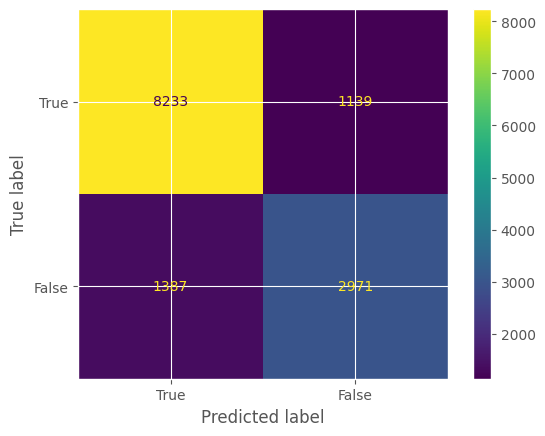

In [116]:
#Random Forest
y_pred_rf = classifier_rf.predict(X_test_chi2)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_rf, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()


# KNN

In [109]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, 
                                      metric = 'minkowski',
                                      p = 2)

classifier_knn.fit(X_train_chi2, y_train)

KNeighborsClassifier()

In [112]:
# y_pred_knn  = accuracy_score(y_pred_rf , y_test)
# print("Test accuarcy: {:.2f}%".format(y_pred_knn  *100))

[[2852 1506]
 [1288 8084]]


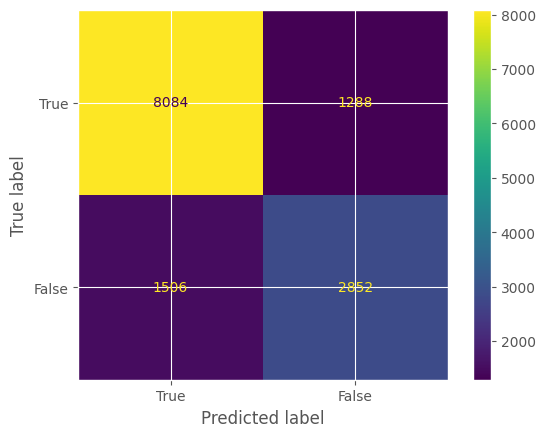

In [111]:
y_pred_knn = classifier_knn.predict(X_test_chi2)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [113]:

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      4358
           1       0.84      0.86      0.85      9372

    accuracy                           0.80     13730
   macro avg       0.77      0.76      0.76     13730
weighted avg       0.79      0.80      0.80     13730



## Accuracy

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

# Measuring

In [ ]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

# Matrix tests 

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, svm_predictions , labels=svm_model_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model_linear.classes_)
disp.plot()

In [ ]:
style.use('classic')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_rf, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [ ]:
# cm = confusion_matrix(y_test, y_pred_knn)
# print(cm)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn, labels = [1,0]), display_labels = [True, False])
# cm_display.plot()
# plt.show()

## report

In [ ]:
print(classification_report(y_test, logreg_predict))

In [ ]:
print(classification_report(y_test, svm_predictions))

In [117]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      4358
           1       0.86      0.88      0.87      9372

    accuracy                           0.82     13730
   macro avg       0.79      0.78      0.78     13730
weighted avg       0.81      0.82      0.81     13730



In [118]:

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      4358
           1       0.84      0.86      0.85      9372

    accuracy                           0.80     13730
   macro avg       0.77      0.76      0.76     13730
weighted avg       0.79      0.80      0.80     13730



In [ ]:
print(classification_report(y_test, logreg_predict))

# Extra code

In [ ]:
# pip install scikit-plot

In [ ]:
#from sklearn.svm import SVC

In [ ]:

#Random oversampling on training data
'''from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(x_train, y_train)

In [ ]:

'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics





def getStatsFromModel(model):
  print(classification_report(y_test, y_pred))
  # disp = plot_precision_recall_curve(model, X_test, y_test)
  disp = skplt.metrics.plot_precision_recall(y_train, y_pred)
  disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')
  
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()




# Model, SVM
from sklearn import svm


clf = svm.SVC(kernel='linear', verbose=True)
clf.fit(X_over, y_over)
y_pred = clf.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(clf)







#Supervised Methods
# 3 normal methods
# 2 ensemble methods
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
X_over = X_over.toarray()
gnbmodel = gnb.fit(X_over, y_over)
y_pred = gnbmodel.predict(x_test)
print ("Score:", gnbmodel.score(x_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(gnb)
'''

# Testing user input

```
# This is formatted as code
```



In [ ]:
import pandas as pd
import numpy as np
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer, WordNetLemmatizer
import pickle

In [ ]:
#from tensorflow.keras import models
#model = models.load_model("neural_network")

In [ ]:
def custom_input_prediction(text):
    import nltk
    nltk.download('omw-1.4')
    #print(text)
    #text = pd.Series(text)
    #print(text)
    text = str(data_processing(text))
    print(text)
    text = [text]
    print(text)
    vectoriser = pickle.load(open("vectorizer", "rb"))
    text = vectoriser.transform(text)
    loaded_topchi2 = np.load('topchi2.npy')
#     X_train_chi2 = X_train[:, topchi2]
    text = text[:,loaded_topchi2]
    model = pickle.load(open("logreg", "rb"))
    prediction = model.predict(text)
    #print(prediction)
    prediction = prediction[0]
    #print(prediction)
    interpretations = {
        0 : "not bully",
        1 : "bully"
      
    }

    for i in interpretations.keys():
        if i == prediction:
            return interpretations[i]

In [ ]:
something = "My Grandsons are angry about this gender free crap too! 2 in primary 2 @at high school T.he is 16 yr old ASD &amp; got bullied as did a girl in his SEN base. He had to step in as teachers to busy on phones playing games, wee lass would have had nowhere to run if loos unisex!"
something_2 = "But for u its Hinduphobia isnt it? When kashmiri pandits get killed, when a hindu girl gets raped by islamists, when radical islamic terrorism kill people in the world,u still keep quiet as if nothing is happening;but jump on when some1 says anything against islam!! #Hinduphobic"
new_something = "There was certainly a more ""acceptable"" time for them to be made though in the eyes of our world at large (which also includes other jokes like rape, gaybashing, etc.) Shit, try watching Friends or Seinfeld and watch how many times they throw gay people under the bus for a laugh."
sentence="akshatha is good"
print(custom_input_prediction(sentence))

In [ ]:
text="i agree"
text=[text[0],]
print(text)